In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [40]:
files = glob('./data/assignments/*.csv', 
                   recursive = True)
df = pd.concat([pd.read_csv(f) for f in files])
# df.loaded_distance = df.loaded_distance.apply(lambda x: x.replace(' mi', '')).astype(float) # Formatting loaded_distance
df['origin'] = pd.Series(zip(df.origin_lat, df.origin_lng))
df['destination'] = pd.Series(zip(df.destination_lat, df.destination_lng))
df = df.drop(['origin_lat', 'origin_lng', 'destination_lat', 'destination_lng'], axis=1)
df['trip_type'] = np.NaN
# df = df[:len(df)//100]
df.head()

,id,loaded_distance,appt_date,appt_time,client_id,driver_id,program_name,origin,destination,trip_type
0,488034,92.6 mi,2021-09-01,16:30,14352,397,NaN,"(44.38, -75.71)","(43.25, -76.23)",NaN
1,488036,52.6 mi,2021-09-01,06:30,12181,495,ONE,"(43.06, -72.45)","(43.68, -72.27)",NaN
2,488037,92.6 mi,2021-09-01,16:30,14353,397,NaN,"(44.38, -75.71)","(43.25, -76.23)",NaN
3,488038,53.5 mi,2021-09-01,08:40,12181,495,ONE,"(43.68, -72.27)","(43.06, -72.45)",NaN
4,488039,27.2 mi,2021-09-01,16:30,3852,466,NaN,"(43.9, -75.67)","(43.62, -75.36)",NaN


In [41]:
df.shape

(188078, 10)

### Trips classification
For now, we define one trip per day per client, and there are 3 types of trips:
- One-way trip: a trip with only 1 leg.
- Round trip: a trip with 2 legs that has the same origin and destination
- Round multi-leg trip: a trip with 3 or more legs that has the same origin and destination
- Non-round multi-leg trip: a trip with **2** or more legs that has the different origin and destination origin and destination. <br>

In [42]:
def classify_trip(df):
    if len(df) == 0:
        return df
    if len(df) == 1:
        df.trip_type = 'one-way'
        return df
    if df.iloc[0].origin == df.iloc[1].destination:
        if len(df) == 2:
            df.trip_type = 'round'
            return df
        df.trip_type = 'round multi-leg'
        return df
    df.trip_type = 'non-round multi-leg'
    return df

df = df.groupby(['client_id', 'appt_date'], group_keys=True).apply(classify_trip)
df.head()
        

id loaded_distance   appt_date appt_time  \
client_id appt_date                                                        
48        2021-07-28 12961  470677         94.9 mi  2021-07-28     13:30   
                     13324  471040         94.9 mi  2021-07-28     14:30   
                     13448  471164          318 mi  2021-07-28     13:30   
          2021-08-18 7933   480834         30.5 mi  2021-08-18     11:00   
                     8067   480968         29.7 mi  2021-08-18     12:30   

                            client_id  driver_id program_name  \
client_id appt_date                                             
48        2021-07-28 12961         48        470       STLMCD   
                     13324         48        470       STLMCD   
                     13448         48        470       STLMCD   
          2021-08-18 7933          48        235       STLMCD   
                     8067          48        235       STLMCD   

                                     origin      destination  \
client_id appt_date                                            
48        2021-07-28 12961  (43.12, -71.89)   (43.2, -71.56)   
                     13324  (44.15, -75.72)  (44.33, -75.92)   
                     13448   (43.58, -71.2)  (43.53, -71.47)   
          2021-08-18 7933   (43.98, -75.92)  (44.16, -75.81)   
                     8067   (44.68, -74.97)  (44.66, -75.03)   

                                      trip_type  
client_id appt_date                              
48        2021-07-28 12961  non-round multi-leg  
                     13324  non-round multi-leg  
                     13448  non-round multi-leg  
          2021-08-18 7933   non-round multi-leg  
                     8067   non-round multi-leg

In [43]:
df[df.trip_type =='round']

id loaded_distance   appt_date appt_time  \
client_id appt_date                                                        
48        2021-09-14 5733   493792         95.7 mi  2021-09-14     13:30   
                     6037   494096         96.4 mi  2021-09-14     15:00   
50        2021-09-02 862    488897          8.5 mi  2021-09-02     10:00   
                     1170   489205          9.3 mi  2021-09-02     11:00   
          2021-09-03 1437   489472          8.5 mi  2021-09-03     11:00   
...                            ...             ...         ...       ...   
18818     2022-11-09 5083   721589         21.4 mi  2022-11-09     11:00   
18855     2022-11-15 7783   724306         28.1 mi  2022-11-15     11:00   
                     8066   724589         28.1 mi  2022-11-15     15:00   
18895     2022-11-23 12688  729284         29.2 mi  2022-11-23     06:45   
                     12689  729285         29.2 mi  2022-11-23     10:45   

                            client_id  driver_id program_name  \
client_id appt_date                                             
48        2021-09-14 5733          48        236       STLMCD   
                     6037          48        236       STLMCD   
50        2021-09-02 862           50         91       STLMCD   
                     1170          50         91       STLMCD   
          2021-09-03 1437          50        157       STLMCD   
...                               ...        ...          ...   
18818     2022-11-09 5083       18818        665         EMCD   
18855     2022-11-15 7783       18855        385        STLAW   
                     8066       18855        385        STLAW   
18895     2022-11-23 12688      18895       1247          NaN   
                     12689      18895       1247          NaN   

                                     origin      destination trip_type  
client_id appt_date                                                     
48        2021-09-14 5733   (44.93, -74.89)  (43.95, -75.91)     round  
                     6037   (43.95, -75.91)  (44.93, -74.89)     round  
50        2021-09-02 862    (44.83, -74.98)  (44.92, -74.89)     round  
                     1170   (44.92, -74.89)  (44.83, -74.98)     round  
          2021-09-03 1437   (44.83, -74.98)  (44.92, -74.89)     round  
...                                     ...              ...       ...  
18818     2022-11-09 5083    (43.71, -75.4)  (43.98, -75.92)     round  
18855     2022-11-15 7783   (43.31, -76.39)  (43.42, -75.87)     round  
                     8066   (43.45, -76.46)  (43.31, -76.39)     round  
18895     2022-11-23 12688  (44.15, -75.33)  (43.97, -75.91)     round  
                     12689  (43.97, -75.91)  (44.15, -75.33)     round  

[12866 rows x 10 columns]

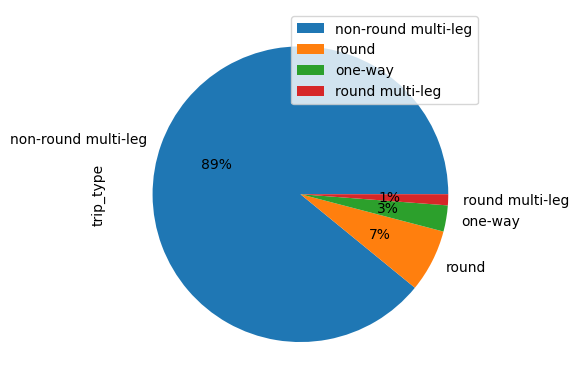

In [44]:
df.trip_type.value_counts().plot(kind='pie',autopct='%0.0f%%', legend=True);

In [31]:
df.trip_type.value_counts()

multi-leg    169841
round         12866
one-way        5371
Name: trip_type, dtype: int64